In [2]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import network_stats as ns
import us
mp.rcParams['figure.dpi'] = 600


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# from gerrytools.data import geometries20
# import os

# os.mkdir("data/vtd_shapefiles")

# for state in us.STATES:
#     cen_fname = "tl_2020_" + state.fips + "_vtd20"
#     geometries20(state, "data/vtd_shapefiles/" + cen_fname + ".zip", "vtd")

In [4]:
G_block  = ns.import_graph("block", "va")
G_vtd    = ns.import_graph("vtd", "va")
G_county = ns.import_graph("county", "va")

gdf_block  = gpd.GeoDataFrame.from_file(f"./data/block_shapefiles/tl_2020_51_tabblock20/tl_2020_51_tabblock20.shp")
gdf_vtd    = gpd.GeoDataFrame.from_file(f"./data/vtd_shapefiles/tl_2020_51_vtd20.zip")
gdf_county = gpd.GeoDataFrame.from_file("./data/county_shapefiles/tl_2020_51_county20/tl_2020_51_county20.shp")

In [5]:
positions = []

for gdf in [gdf_block, gdf_vtd, gdf_county]:
    intpts = gdf[["GEOID20", "INTPTLAT20", "INTPTLON20"]].astype({"GEOID20": "str", "INTPTLAT20": "float", "INTPTLON20": "float"})
    positions.append(dict(zip(intpts.GEOID20, zip(intpts.INTPTLON20, intpts.INTPTLAT20))))
    

In [6]:
labeled_by_geoid = []

for graph in [G_block, G_vtd, G_county]:
    labeled_by_geoid.append(nx.relabel_nodes(graph, dict(graph.nodes(data="GEOID20"))))

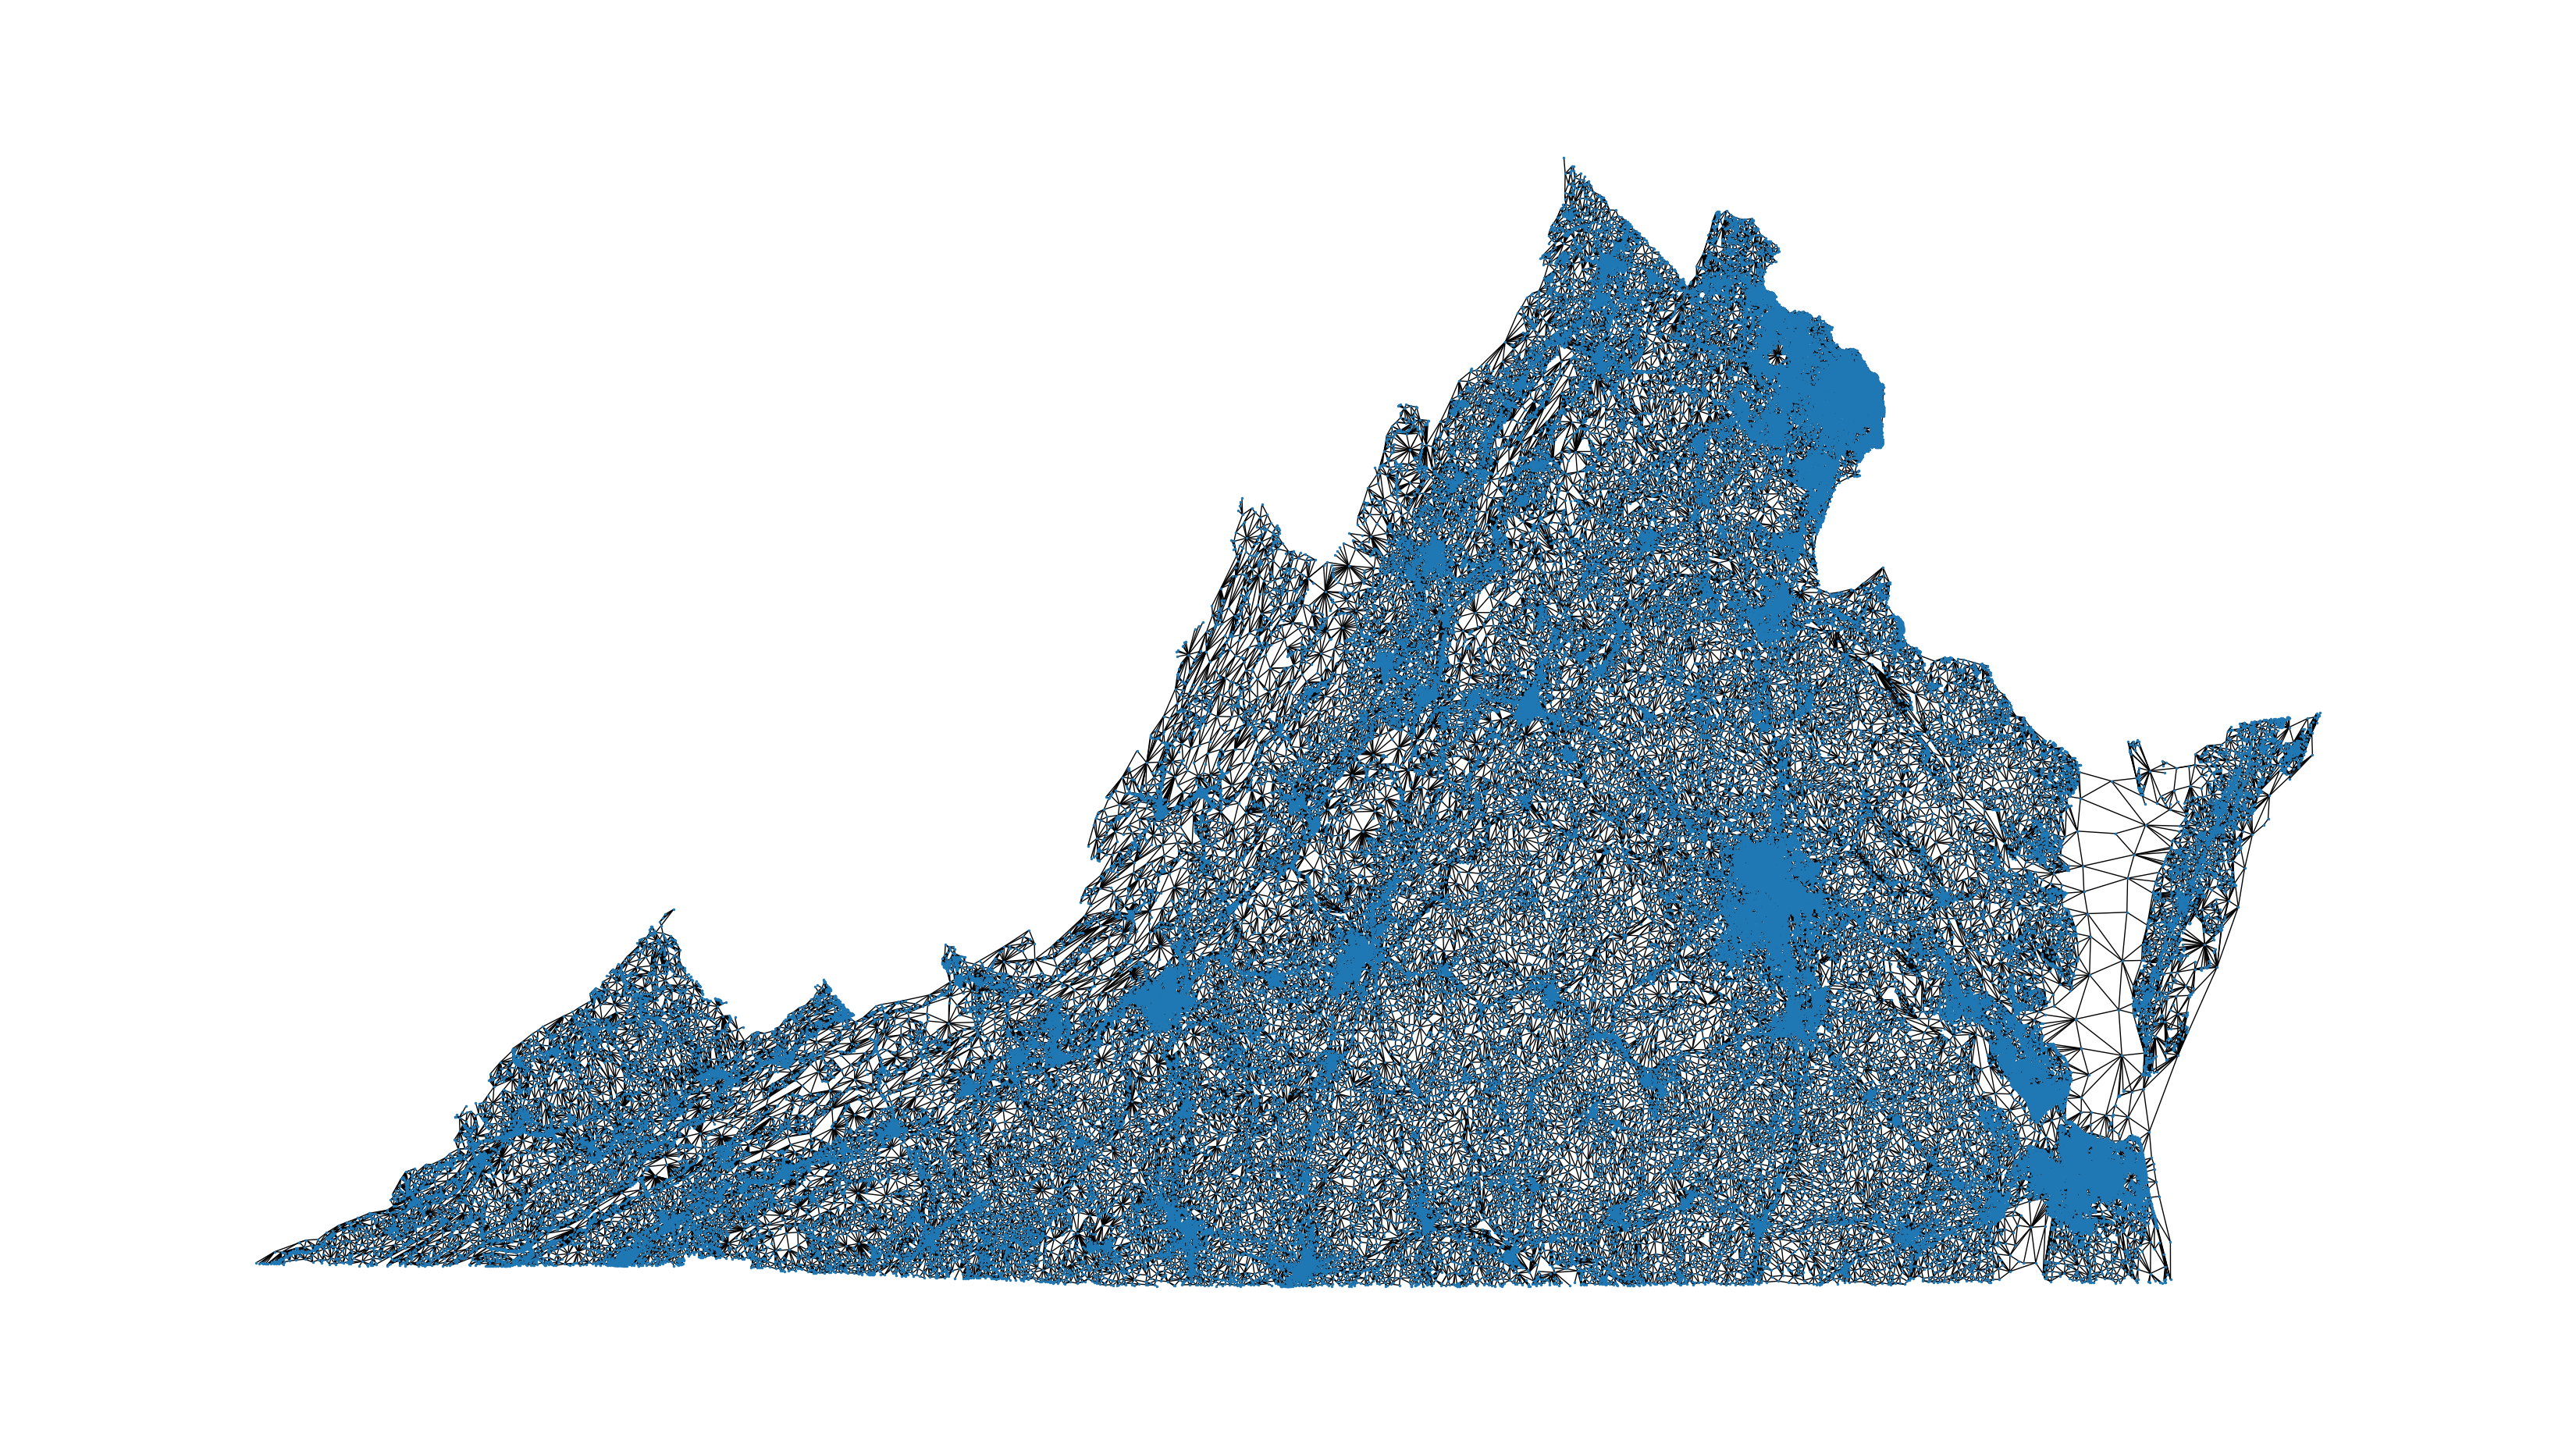

In [12]:
nx.draw(labeled_by_geoid[0], pos=positions[0], node_size=1, width=0.2, node_shape=".", linewidths=0.0)
plt.gcf().set_figheight(3.5)

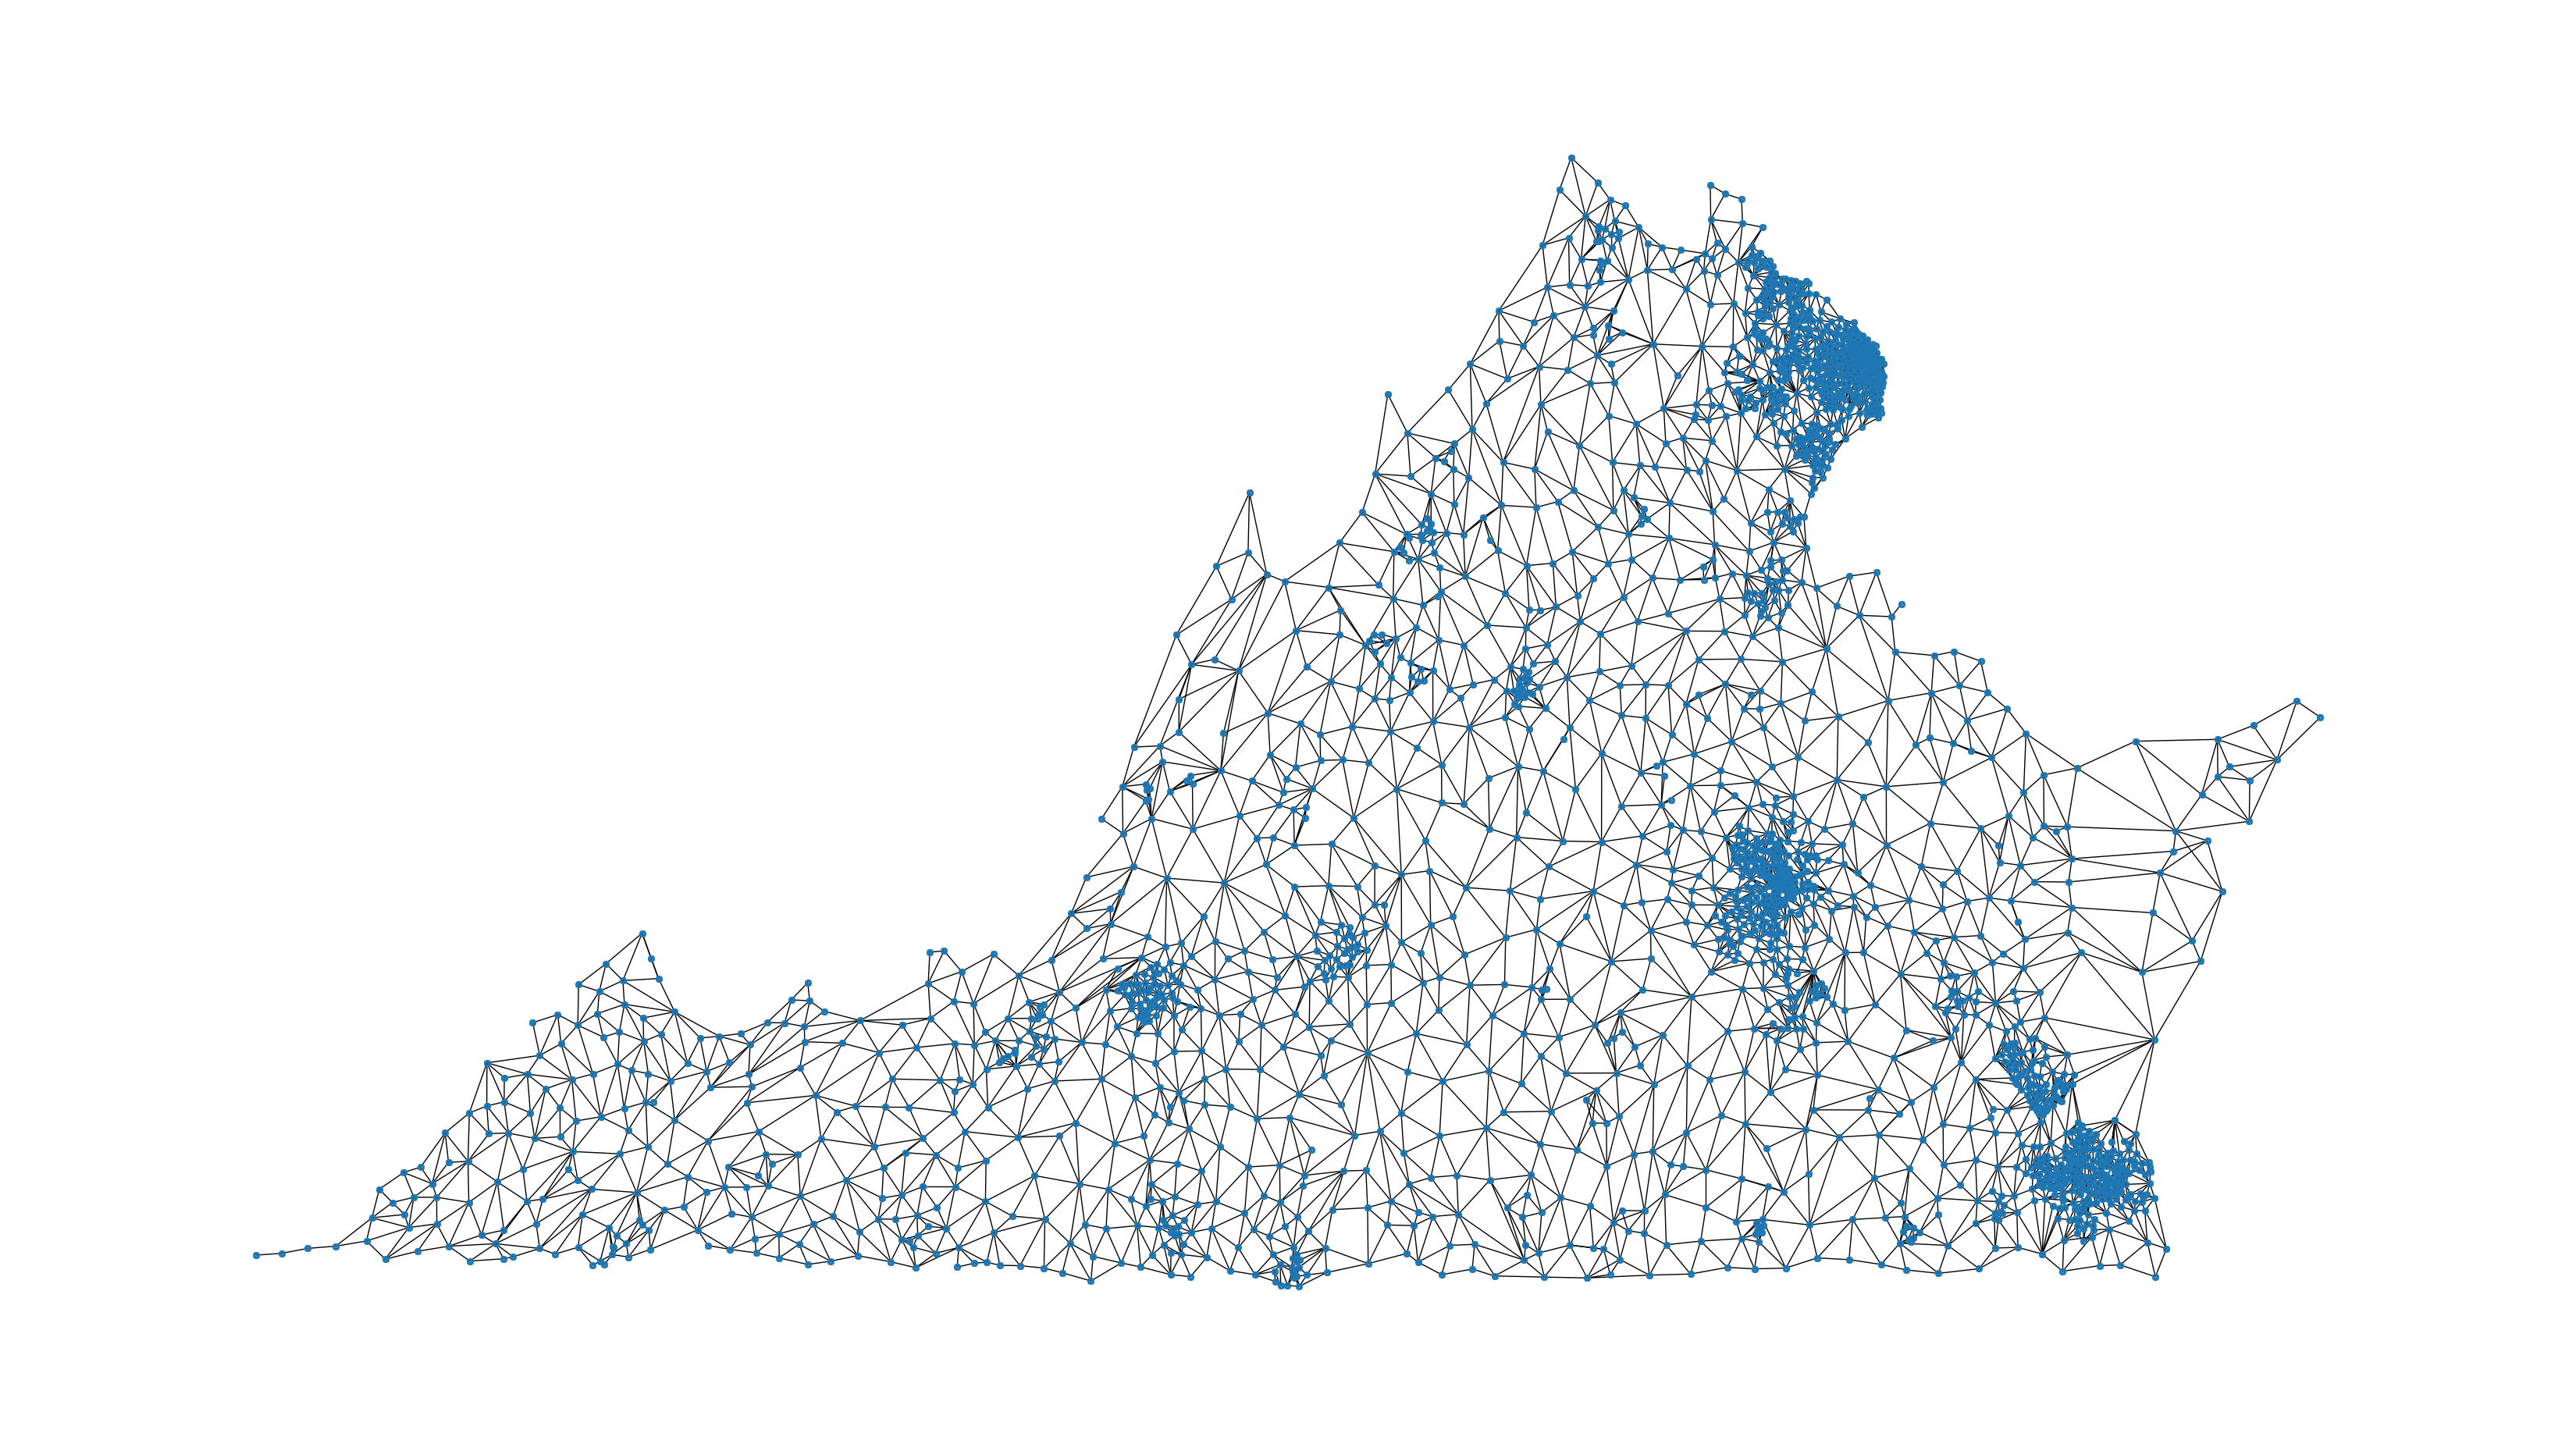

In [8]:
nx.draw(labeled_by_geoid[1], pos=positions[1], node_size=0.05, width=0.2, node_shape=",")
plt.gcf().set_figheight(3.5)

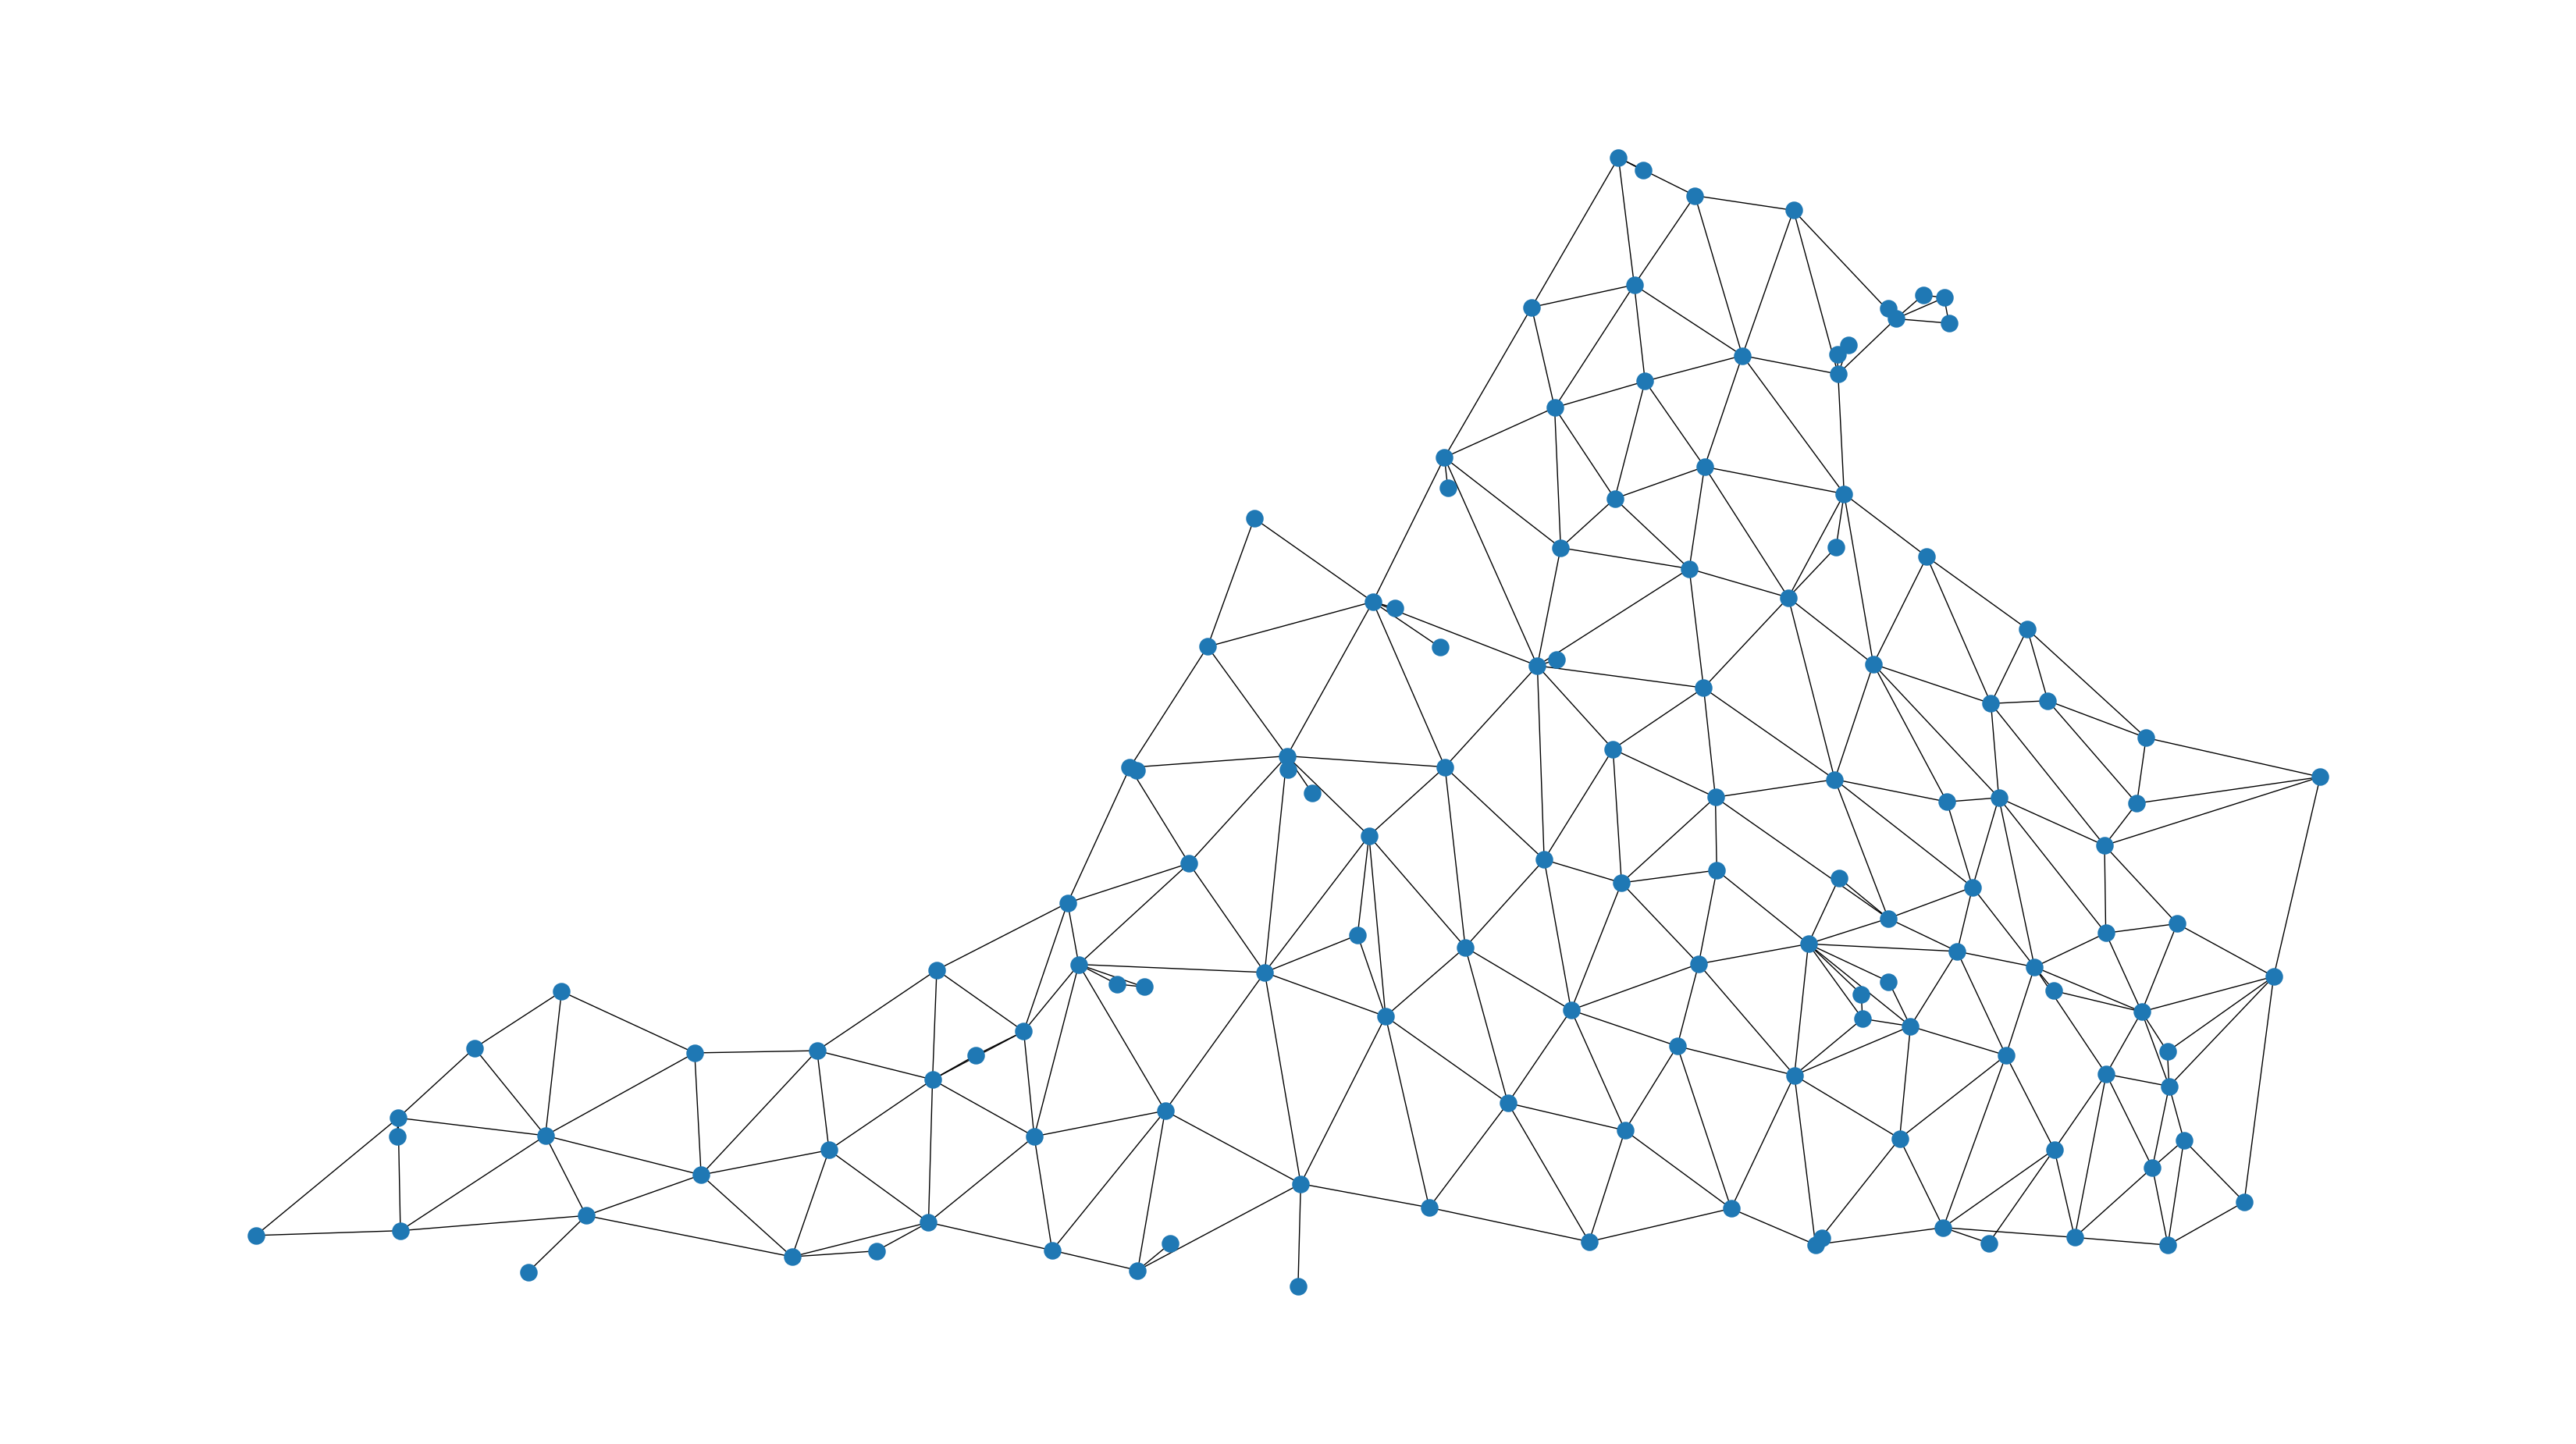

In [9]:
nx.draw(labeled_by_geoid[2], pos=positions[2], node_size=5, width=0.2, node_shape="o")
plt.gcf().set_figheight(3.5)